In [2]:
# This code is related to limiting the tensorflow GPU ---------------------------
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('irish_song.txt',delimiter='\n',header=None)
data.columns = ['lyrics']
data

,lyrics
0,Come all ye maidens young and fair
1,And you that are blooming in your prime
2,Always beware and keep your garden fair
3,Let no man steal away your thyme
4,For thyme it is a precious thing
...,...
1687,And on it I will build
1688,All the flowers of the mountain
1689,If my true love she were gone
1690,I would surely find another


In [5]:
data.shape

(1692, 1)

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense

In [7]:
corpus =  data['lyrics'].str.lower().values.tolist()

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

#print(tokenizer.word_index)
#print(len(tokenizer.word_index))

In [9]:
input_sequences = []
for line in corpus:
    seq = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(seq)) :
        n_gram_seq = seq[:i+1]
        input_sequences.append(n_gram_seq)
        
input_sequences
    

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361],
 [2, 11, 15, 31, 361, 8],
 [2, 11, 15, 31, 361, 8, 24],
 [2, 11, 15, 31, 361, 8, 24, 1218],
 [272, 798],
 [272, 798, 2],
 [272, 798, 2, 204],
 [272, 798, 2, 204, 24],
 [272, 798, 2, 204, 24, 579],
 [272, 798, 2, 204, 24, 579, 69],
 [118, 35],
 [118, 35, 119],
 [118, 35, 119, 799],
 [118, 35, 119, 799, 56],
 [118, 35, 119, 799, 56, 24],
 [118, 35, 119, 799, 56, 24, 184],
 [10, 184],
 [10, 184, 25],
 [10, 184, 25, 23],
 [10, 184, 25, 23, 5],
 [10, 184, 25, 23, 5, 580],
 [10, 184, 25, 23, 5, 580, 456],
 [2, 184],
 [2, 184, 800],
 [2, 184, 800, 12],
 [2, 184, 800, 12, 801],
 [2, 184, 800, 12, 801, 4],
 [2, 184, 800, 12, 801, 4, 7],
 [2, 184, 800, 12, 801, 4, 7, 235],
 [1219, 17],
 [1219, 17, 12],
 [1219, 17, 12, 75],
 [1219, 17, 12, 75, 1220],
 [1219, 17, 12, 75, 1220, 236],
 [1219, 17, 12, 75, 1

In [10]:
maxlength = max([len(i) for i in input_sequences])
maxlength

16

In [11]:
train_padded = pad_sequences(input_sequences,maxlen=maxlength, padding='pre')
train_padded

array([[   0,    0,    0, ...,    0,   51,   12],
       [   0,    0,    0, ...,   51,   12,   96],
       [   0,    0,    0, ...,   12,   96, 1217],
       ...,
       [   0,    0,    0, ...,    0,   47,  105],
       [   0,    0,    0, ...,   47,  105,  138],
       [   0,    0,    0, ...,  105,  138,  184]])

In [12]:
xs , labels = train_padded[:,:-1] , train_padded[:,-1]
xs[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 51])

In [13]:
total_words = len(tokenizer.word_index) + 1

In [14]:
from tensorflow.keras.utils import to_categorical
ys = to_categorical(labels,num_classes = total_words)

In [15]:
ys

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [17]:
model = Sequential()
model.add(Embedding(total_words,64,input_length=len(xs[0])))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(total_words,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
hist = model.fit(xs,ys,epochs=100)

Train on 12038 samples
Epoch 1/100
12038/12038 [==============================] - 17s 1ms/sample - loss: 6.7909 - accuracy: 0.0624
Epoch 2/100
12038/12038 [==============================] - 10s 834us/sample - loss: 6.2901 - accuracy: 0.0708- loss: 6.2934 - accuracy
Epoch 3/100
12038/12038 [==============================] - 9s 777us/sample - loss: 6.1080 - accuracy: 0.0797
Epoch 4/100
12038/12038 [==============================] - 9s 736us/sample - loss: 5.9392 - accuracy: 0.0870
Epoch 5/100
12038/12038 [==============================] - 8s 692us/sample - loss: 5.7577 - accuracy: 0.0953 - loss: 5.7552  - ETA: 0s - los
Epoch 6/100
12038/12038 [==============================] - 9s 771us/sample - loss: 5.5829 - accuracy: 0.1053
Epoch 7/100
12038/12038 [==============================] - 8s 685us/sample - loss: 5.4186 - accuracy: 0.1139
Epoch 8/100
12038/12038 [==============================] - 8s 654us/sample - loss: 5.2731 - accuracy: 0.1210 - loss:
Epoch 9/100
12038/12038 [===============

12038/12038 [==============================] - 11s 948us/sample - loss: 1.0458 - accuracy: 0.7692
Epoch 73/100
12038/12038 [==============================] - 9s 723us/sample - loss: 1.0240 - accuracy: 0.7716
Epoch 74/100
12038/12038 [==============================] - 9s 738us/sample - loss: 1.0062 - accuracy: 0.7760
Epoch 75/100
12038/12038 [==============================] - 11s 889us/sample - loss: 1.0032 - accuracy: 0.7735
Epoch 76/100
12038/12038 [==============================] - 11s 887us/sample - loss: 0.9699 - accuracy: 0.7826
Epoch 77/100
12038/12038 [==============================] - 9s 728us/sample - loss: 0.9453 - accuracy: 0.7882
Epoch 78/100
12038/12038 [==============================] - 11s 885us/sample - loss: 0.9312 - accuracy: 0.7932
Epoch 79/100
12038/12038 [==============================] - 9s 775us/sample - loss: 0.9202 - accuracy: 0.7939
Epoch 80/100
12038/12038 [==============================] - 12s 996us/sample - loss: 0.9047 - accuracy: 0.7944
Epoch 81/100
12038

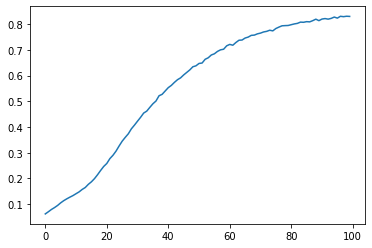

In [19]:
plt.plot(hist.history['accuracy'])

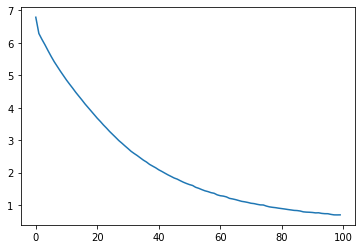

In [20]:
plt.plot(hist.history['loss'])